In [1]:
import pandas as pd

In [2]:
col_Names=["symboling", "normalized_losses", "make", "fuel_type","aspiration", "num_of_doors", "body_style", "drive_wheels","engine_location", "wheel_base", "length", "width"
          ,"height", "curb_weight", "engine_type", "num_of_cylinders","engine_size", "fuel_system", "bore", "stroke","compression_ratio", "horsepower", "peak_rpm", "city_mpg"," highway_mpg","price"]
data= pd.read_csv('imports-85.csv',names=col_Names)

In [3]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
data.shape

(205, 26)

In [5]:
data.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [6]:
## Find out if there are null fields
data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
 highway_mpg         0
price                0
dtype: int64

In [7]:
# Find out number of records having '?' value for normalized losses
data["normalized_losses"].loc[data["normalized_losses"]=="?"].count()

41

In [8]:
# Setting the missing value to mean of normalized losses and conver the datatype to integer
nl=data["normalized_losses"].loc[data["normalized_losses"]!="?"]

In [9]:
type(nl)

pandas.core.series.Series

In [10]:
nlmean = nl.astype(str).astype(int).mean()

In [11]:
data["normalized_losses"]= data["normalized_losses"].replace('?',nlmean).astype(int)

In [12]:
data["normalized_losses"].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized_losses, dtype: int32

In [13]:
# Find out the number of values which are not numeric
data["price"].str.isnumeric().value_counts()

True     201
False      4
Name: price, dtype: int64

In [14]:
# List out the values which are not numeric
data['price'].loc[data['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [15]:
# Setting up the missing value by mean of the price and convert to integer
price=data['price'].loc[data['price'].str.isnumeric() != False]

In [16]:
PriceMean=price.astype(str).astype(int).mean()

In [17]:
data["price"]= data["price"].replace('?',PriceMean).astype(int)
data["price"].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

In [18]:
# Checking the numberic and replacing with mean value and conver the datatype to integer
print(data['horsepower'].str.isnumeric().value_counts())
horsepower = data['horsepower'].loc[data['horsepower'] != '?']
hpmean = horsepower.astype(str).astype(int).mean()
print(hpmean)
data['horsepower'] = data['horsepower'].replace('?',hpmean).astype(int)


True     203
False      2
Name: horsepower, dtype: int64
104.25615763546799


In [19]:
#Checking the outlier of horsepower
data.loc[data['horsepower'] > 10000]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [20]:
# Find out the number of invalid value
data['bore'].loc[data['bore'] == '?']

55    ?
56    ?
57    ?
58    ?
Name: bore, dtype: object

In [21]:
# Replace the non-numeric value to null and conver the datatype
data['bore'] = pd.to_numeric(data['bore'],errors='coerce')
data.dtypes

symboling              int64
normalized_losses      int32
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke                object
compression_ratio    float64
horsepower             int32
peak_rpm              object
city_mpg               int64
 highway_mpg           int64
price                  int32
dtype: object

In [22]:
# remove the records which are having the value '?'
data['num_of_doors'].loc[data['num_of_doors'] == '?']
data = data[data['num_of_doors'] != '?']
data['num_of_doors'].loc[data['num_of_doors'] == '?']

Series([], Name: num_of_doors, dtype: object)

## Univariate Analysis
### Import libraries

In [23]:
import matplotlib.pyplot as plt
% matplotlib inline

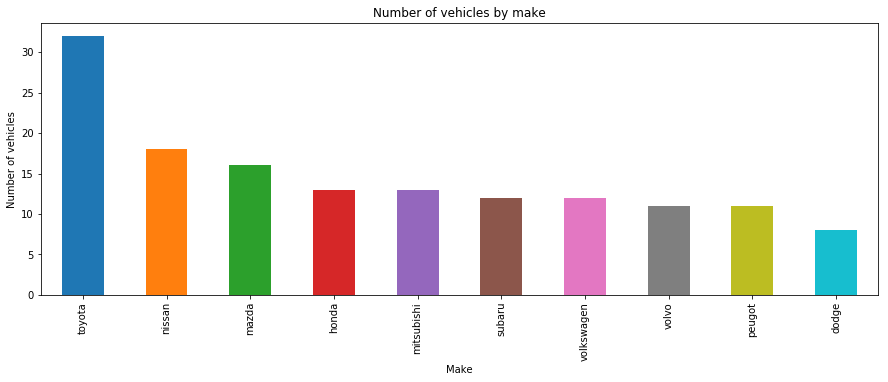

In [24]:
data.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

### Insurance risk ratings Histogram

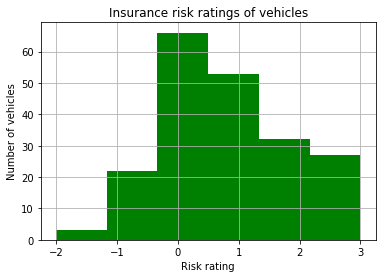

In [25]:
data.symboling.hist(bins=6,color='green');
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');

### Normalized losses histogram

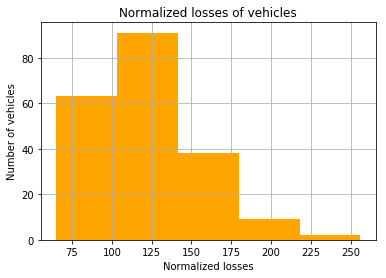

In [26]:
data['normalized_losses'].hist(bins=5,color='orange');
plt.title("Normalized losses of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized losses');

### Fuel type bar chart

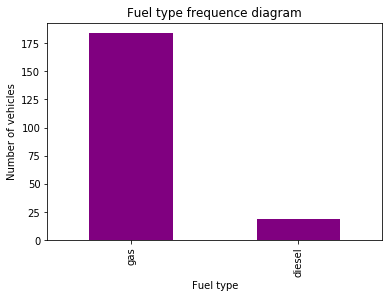

In [27]:
data['fuel_type'].value_counts().plot(kind='bar',color='purple')
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

### Horse power histogram

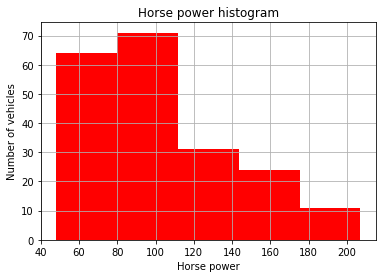

In [28]:
import numpy as np
data.horsepower[np.abs(data.horsepower-data.horsepower.mean())<=(3*data.horsepower.std())].hist(bins=5,color='red');
plt.title("Horse power histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Horse power');

### Fuel type pie diagram

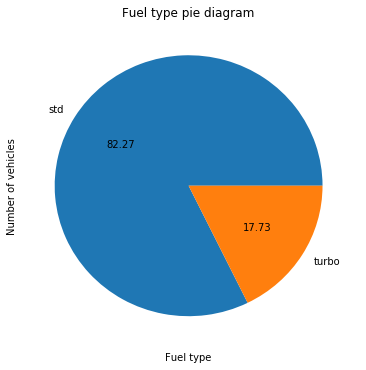

In [29]:
data['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Fuel type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

### Curb weight histogram

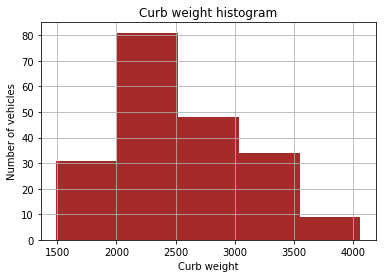

In [30]:
data['curb_weight'].hist(bins=5,color='brown');
plt.title("Curb weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight');

### Drive wheels bar chart

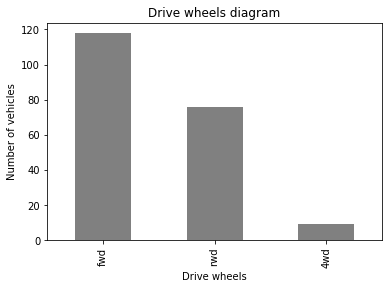

In [31]:
data['drive_wheels'].value_counts().plot(kind='bar',color='grey')
plt.title("Drive wheels diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels');

### Number of doors bar chart

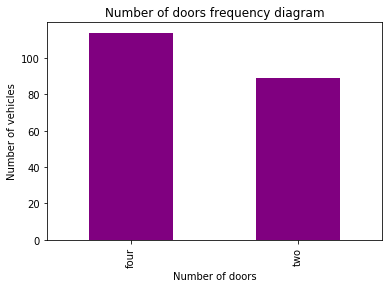

In [32]:
data['num_of_doors'].value_counts().plot(kind='bar',color='purple')
plt.title("Number of doors frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of doors');

## Findings

### We have taken some key features of the automobile dataset for this analysis and below are our findings.

#### 1.Toyota is the make of the car which has most number of vehicles with more than 40% than the 2nd highest Nissan
#### 2.Most preferred fuel type for the customer is standard vs trubo having more than 80% of the choice
#### 3.For drive wheels, front wheel drive has most number of cars followed by rear wheel and four wheel. There are very less number of cars for four wheel drive.
#### 4.Curb weight of the cars are distributed between 1500 and 4000 approximately
#### 5.Symboling or the insurance risk rating have the ratings between -3 and 3 however for our dataset it starts from -2. There are more cars in the range of 0 and 1.
#### 6.Normalized losses which is the average loss payment per insured vehicle year is has more number of cars in the range between 65 and 150.

## Correlation Analysis
### Findings: There are some good inferences we can take it from the correlation heat map.

#### 1.Price is more correlated with engine size and curb weight of the car
#### 2.Curb weight is mostly correlated with engine size, length, width and wheel based which is expected as these adds up the weight of the car
#### 3.Wheel base is highly correlated with length and width of the car
#### 4.Symboling and normalized car are correlated than the other fields

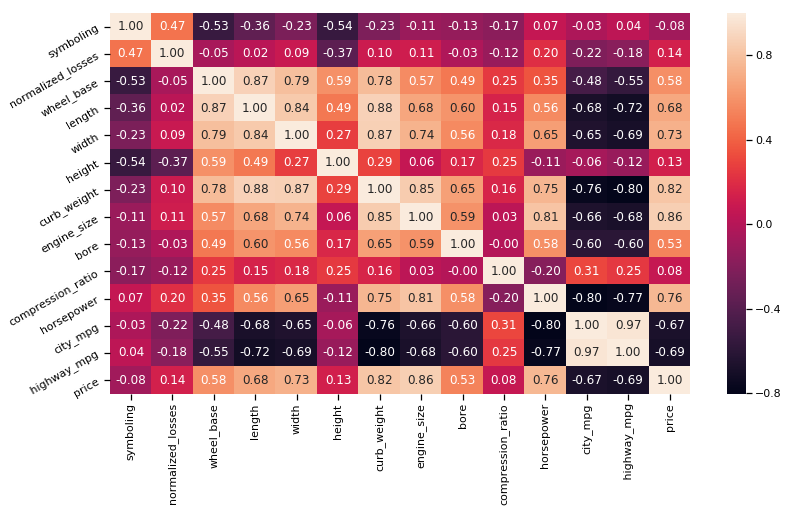

In [33]:
import seaborn as sns
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

### Bivariate Analysis

#### Boxplot of Price and make
##### Findings: Below are our findings on the make and price of the car
 ######   ○ The most expensive car is manufacture by Mercedes benz and the least expensive is Chevrolet
 ######   ○ The premium cars costing more than 20000 are BMW, Jaquar, Mercedes benz and Porsche
 ######   ○ Less expensive cars costing less than 10000 are Chevrolet, Dodge, Honda, Mitsubishi, Plymoth and Subaru
 ######   ○ Rest of the cars are in the midrange between 10000 and 20000 which has the highest number of cars

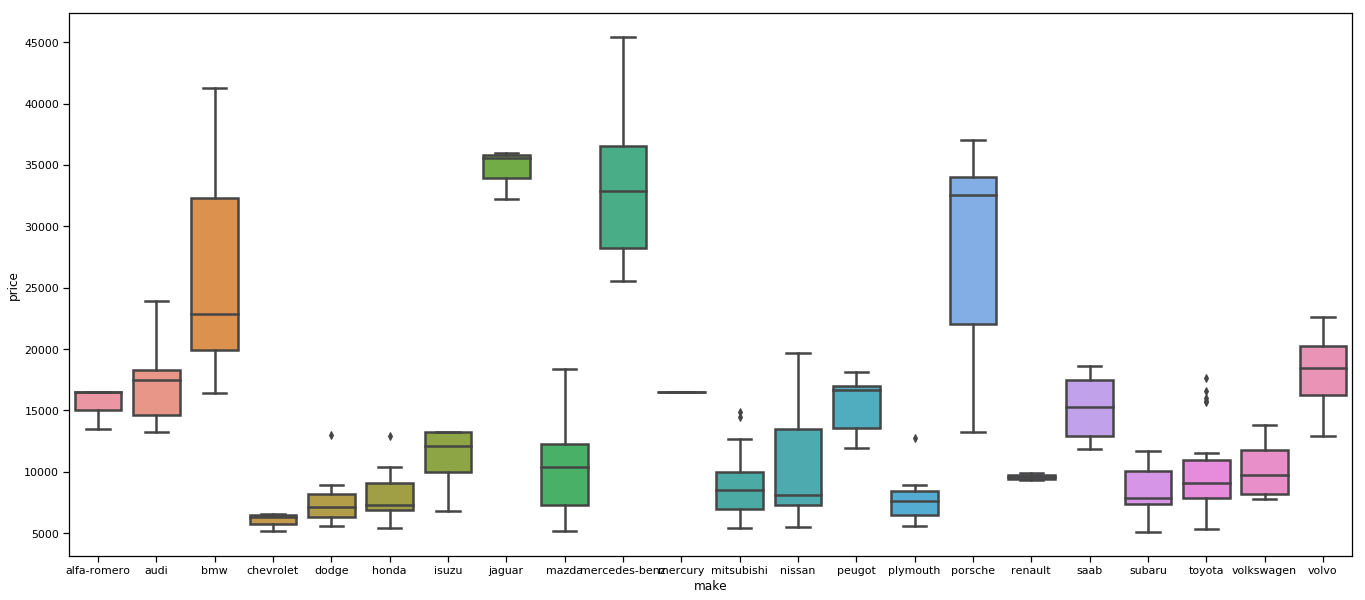

In [34]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=data)

### Scatter plot of price and engine size
#### Findings: The more the engine size the costlier the price is

C:\Users\mahtam\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


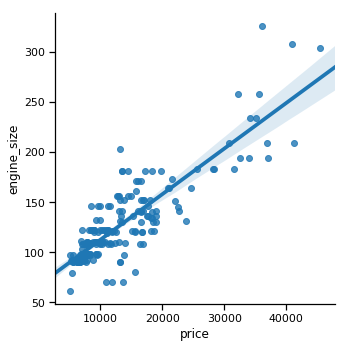

In [35]:
g = sns.lmplot('price',"engine_size", data);

### Scatter plot of normalized losses and symboling
#### Findings: From the scattered plot, it's very evident that the lesser the rating lesser the normalized loss. It looks like the negative ratings are better for the car which has lesser losses.

C:\Users\mahtam\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


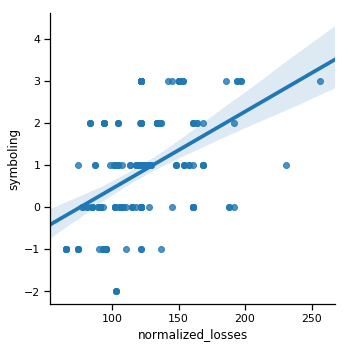

In [36]:
g = sns.lmplot('normalized_losses',"symboling", data);

### Scatter plot of Engine size and Peak RPM


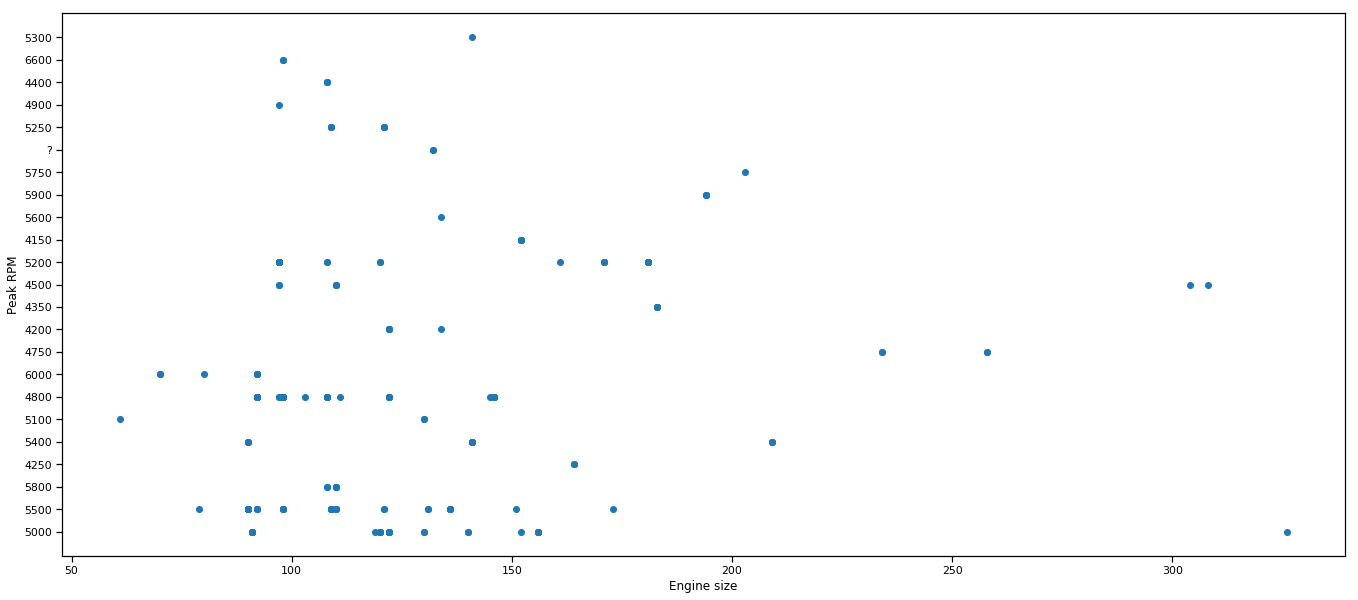

In [37]:
plt.scatter(data['engine_size'],data['peak_rpm'])
plt.xlabel('Engine size')
plt.ylabel('Peak RPM');

### Scatter plot of City and Highway MPG, Curb weight based on Make of the car
#### Based on the scatter plot and the provided data set, it is clear that for both city and highway mileage of the automobile is inversely proportional to the curb weight.

#### Heavier the Automobile less is the mileage for both City and Highway

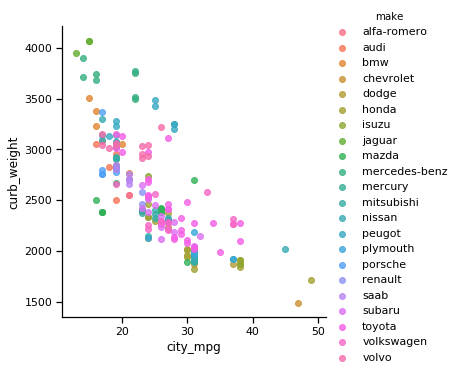

In [38]:
g = sns.lmplot('city_mpg',"curb_weight", data, hue="make", fit_reg=False);

In [42]:
g = sns.lmplot("highway_mpg","curb_weight", data, hue="make",fit_reg=False);


KeyError: "['highway_mpg'] not in index"

### Drive wheels and City MPG bar chart

In [41]:
data.groupby('drive-wheels')['city-mpg'].mean().plot(kind='bar', color = 'peru');
plt.title("Drive wheels City MPG")
plt.ylabel('City MPG')
plt.xlabel('Drive wheels');

KeyError: 'drive-wheels'